## CSC 555: Mining Big Data
### Assignment 1 (due Sunday, January 19th) 

#### a)	Compute (you can use any tool to compute answers in this part – but if you do not know to perform this computation, please talk to me about prerequisites):

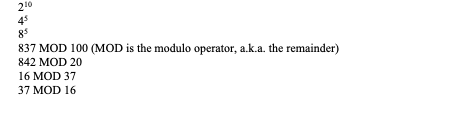

In [26]:
print(2**10)
print(4**5)
print(8**5)
print(837 % 100)
print(842 % 20)
print(16 % 37)
print(37 % 16)

1024
1024
32768
37
2
16
5


#### b)	Given vectors V1 = (1, 2, 3) and V2 = (2, 1, 2) and a 3x3 matrix M = [(2, 1, 3), (1, 2, 2), (1, 0, 2)], compute:

V2 – V1 

V1 + V1 

|V1| (vector length, not the number of dimensions)

|V2| 

M * V2 (matrix times vector, transpose it as necessary)

M * M (or M2)

M3

In [27]:
import numpy as np

In [28]:
V1=np.array([1,2,3])
V2=np.array([2,1,2])

In [29]:
V2-V1

array([ 1, -1, -1])

In [30]:
V1+V1

array([2, 4, 6])

In [31]:
np.linalg.norm(V1)

3.7416573867739413

In [32]:
np.linalg.norm(V2)

3.0

In [33]:
M = np.array([[2, 1, 3], [1, 2, 2], [1, 0, 2]])
M

array([[2, 1, 3],
       [1, 2, 2],
       [1, 0, 2]])

In [34]:
M.dot(V2)

array([11,  8,  6])

In [35]:
M**2

array([[4, 1, 9],
       [1, 4, 4],
       [1, 0, 4]])

In [36]:
M**3

array([[ 8,  1, 27],
       [ 1,  8,  8],
       [ 1,  0,  8]])

#### c)	Suppose we are flipping a coin with Head (H) and Tail (T) sides. The coin is not balanced with 0.6 probability of H coming up (and 0.4 of T). Compute the probabilities of getting

HTHT

THTT

Exactly 1 Head out of a sequence of 4 coin flips.

Exactly 1 Tail out of sequence of 4 coin flips.

In [37]:
H=0.6
T=0.4

In [38]:
H*T*H*T

0.0576

In [39]:
T*H*T*T

0.038400000000000004

In [40]:
(H*T*T*T)*4

0.15360000000000001

In [41]:
(H*H*H*T)*4

0.3456

####  d)	Consider a database schema consisting of two tables, Employee (ID, Name, Address), Project (PID, Name, Deadline), Assign(EID, PID, Date). 

    Assign.EID is a foreign key referencing employee’s ID and Assign.PID is a foreign key referencing the project.

In [64]:
import sqlite3
conn = sqlite3.connect('CSC555HW01.db')
c = conn.cursor()

Employeetable = '''CREATE TABLE Employee(
ID Number(10),
Name VARCHAR(40),
Address VARCHAR(40)
);'''

Projectetable = '''CREATE TABLE Project(
PID Number(10),
Name VARCHAR(40),
Deadline VARCHAR(40)
);'''

Assignetable = '''CREATE TABLE Assign(
EID Number(10),
PID Number(40),
Date VARCHAR(40)
);'''

c.execute('DROP TABLE IF EXISTS Employee');
c.execute('DROP TABLE IF EXISTS Project');
c.execute('DROP TABLE IF EXISTS Assign');
c.execute(Employeetable);
c.execute(Projectetable);
c.execute(Assignetable)




In [65]:
data= ["INSERT INTO Employee Values(1, 'a', '111 N. Wabash Avenue')",
"INSERT INTO Employee Values(2, 'b', '112 N. Wabash Avenue')",
"INSERT INTO Employee Values(3, 'c', '113 N. Wabash Avenue')",
"INSERT INTO Employee Values(4, 'd', '114 N. Wabash Avenue')",
"INSERT INTO Project Values(10, 'aa', '1/2')",
 "INSERT INTO Project Values(11, 'ab', '1/2')",
 "INSERT INTO Project Values(14, 'ac', '1/4')",
 "INSERT INTO Assign Values(1, 10, '1/1')",
  "INSERT INTO Assign Values(2, 14, '1/3')"]
for i in data:
    c.execute(i)

In [66]:
print(c.execute('Select * from Employee').fetchall())
print(c.execute('Select * from Project').fetchall())
print(c.execute('Select * from Assign').fetchall())
print(c.execute("INSERT INTO Assign Values(3, 14, '1/3')").fetchall())

[(1, 'a', '111 N. Wabash Avenue'), (2, 'b', '112 N. Wabash Avenue'), (3, 'c', '113 N. Wabash Avenue'), (4, 'd', '114 N. Wabash Avenue')]
[(10, 'aa', '1/2'), (11, 'ab', '1/2'), (14, 'ac', '1/4')]
[(1, 10, '1/1'), (2, 14, '1/3')]
[]


i.	Find projects that are not assigned to any employees (PID and Name of the project).

In [67]:
print(c.execute('''Select PID, Name from Project where PID Not in (SELECT PID FROM Assign)''').fetchall())

[(11, 'ab')]


ii.	For each date, found how many assignments were made that day.

In [68]:
print(c.execute('''Select count(*) from Assign GROUP BY Date''').fetchall())

[(1,), (2,)]


iii.	Find all projects that have fewer than 3 employees assigned to them (note that this should include 2, 1 and 0 in order to be correct)

In [69]:
print(c.execute('''Select *, count(*)  from Project, Assign
where Project.PID = Assign.PID
Group by Assign.PID
Having count(*) < 3 ''').fetchall())

[(10, 'aa', '1/2', 1, 10, '1/1', 1), (14, 'ac', '1/4', 2, 14, '1/3', 2)]


#### e) Mining of Massive Datasets, Exercise 1.3.3  
Justify your answer.

Exercise 1.3.3 : Suppose hash-keys are drawn from the population of all non- negative integers that are multiples of some constant c, and hash function h(x) is x mod 15. For what values of c will h be a suitable hash function, i.e., a large random choice of hash-keys will be divided roughly equally into buckets?


#### Ans:

    The c should be the number that divide 15 and the remainder will have 15 differents in loop. For this code, we can said c interger should be like the prime number to 15, such as 2, 4, 7, 8, 11, 13, 14, 16 .....etc

In [24]:
c={}
d={}
for num in range(1,17):
    a=[]
    for i in range(30):
        r=(num*i)%15
        if r in a:
            pass
        else:
            a.append(r)
    c[num]=len(a)
    d[num]=a
print(c)
print('\n')
print(d)

{1: 15, 2: 15, 3: 5, 4: 15, 5: 3, 6: 5, 7: 15, 8: 15, 9: 5, 10: 3, 11: 15, 12: 5, 13: 15, 14: 15, 15: 1, 16: 15}


{1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 2: [0, 2, 4, 6, 8, 10, 12, 14, 1, 3, 5, 7, 9, 11, 13], 3: [0, 3, 6, 9, 12], 4: [0, 4, 8, 12, 1, 5, 9, 13, 2, 6, 10, 14, 3, 7, 11], 5: [0, 5, 10], 6: [0, 6, 12, 3, 9], 7: [0, 7, 14, 6, 13, 5, 12, 4, 11, 3, 10, 2, 9, 1, 8], 8: [0, 8, 1, 9, 2, 10, 3, 11, 4, 12, 5, 13, 6, 14, 7], 9: [0, 9, 3, 12, 6], 10: [0, 10, 5], 11: [0, 11, 7, 3, 14, 10, 6, 2, 13, 9, 5, 1, 12, 8, 4], 12: [0, 12, 9, 6, 3], 13: [0, 13, 11, 9, 7, 5, 3, 1, 14, 12, 10, 8, 6, 4, 2], 14: [0, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], 15: [0], 16: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}


#### f)	Describe how you would implement a MapReduce job consisting of Map and Reduce description. You do not have to write code or even pseudo-code.  Just describe, in your own words, what the Map and Reduce tasks are going to do.  Map task reads the input file and produces (key, value) pairs.  Reduce task takes a list of (key, value) pairs for each key and combines all values for each key.

Please remember that Map operates on individual blocks and Reduce on individual keys with a set of values. Thus, for Mapper you need to state what your code does given a block of data (i.e., for each block, not for the whole file) and for Reduce you need to state what your reducer does for each key (without being able to see other keys). 
For a data file that contains the following columns: (ID, First, Last, Grade)

i.	For each first name, find the GPA (grade point average) of each student, i.e.,
SELECT First, AVG(Grade) FROM Student GROUP BY First.

    Mapper will identfiy the student first name in key and grade in value, than Reducer matching all the same first name student and average the value which is grade and return the key, first name and value, agerage grade.

ii.	For each full student name, find the best grade, i.e.,
SELECT First, Last, MAX(Grade) FROM Student GROUP BY First, Last.

    Mapper will identfiy the student first and last name in key and grade in value, than Reducer matching all the same first and last name student and max of the value which is grade and return the key, first and last name and value, max grade.